# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
from unityagents import UnityEnvironment

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline


env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

Episode 100	Average Score: 0.030	Current Score: 0.09
Episode 200	Average Score: 0.098	Current Score: 0.10
Episode 245	Average Score: 0.502	Current Score: 2.60
Environment solved in 145 episodes!	Average Score: 0.50


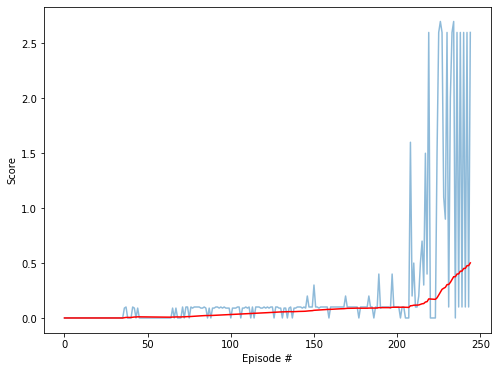

In [5]:
# Define a training function
def maddpg(n_episodes=2000, max_t=1000):
    """Multi-Agent Deep Deterministic Policy Gradient Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_deque = deque(maxlen=100)
    scores_total = []
    average_scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        states = env_info.vector_observations                   # get the current state
        agent.reset()                                           # reset the agent noise
        scores = np.zeros(num_agents)                           # initialize the score
        for t in range(max_t):
            actions = agent.act(states)                         # select an action
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations          # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states                                # roll over to next time step
            scores += rewards                                   # update the score
            if np.any(dones):                                   # exit loop if episode done
                break 
        scores_deque.append(np.max(scores))                     # save most recent score
        scores_total.append(np.max(scores))                     # save most recent score
        average_scores.append(np.mean(scores_deque))            # save most recent average score
        print('\rEpisode {}\tAverage Score: {:.3f}\tCurrent Score: {:.2f}'.format(i_episode, np.mean(scores_deque),np.max(scores)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores_total, average_scores

# Import and define MADDPG agent
from maddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=1)

scores, average_scores = maddpg()

# plot the score over episodes
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, alpha=0.5)
plt.plot(np.arange(len(scores)), average_scores, linewidth=1.5, c='r')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()